# 1ère étape : EDA

- Données : http://vision.stanford.edu/aditya86/ImageNetDogs/
- Description des données : http://vision.stanford.edu/aditya86/ImageNetDogs/

### Imports

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from skimage.io import imread
from skimage.transform import resize
from PIL import Image

import xml.etree.ElementTree as ET

### Parsing du dossier Images

In [17]:
liste_races = os.listdir("Images/")
n_classes = len(liste_races)
print(f"{n_classes} races de chien")

n_total_images = 0
for race in liste_races:
    n_total_images += len(os.listdir("Images/"+str(race)))
print(f"{n_total_images} images au total")

120 races de chien
20580 images au total


### Commençons par afficher quelques images...

In [18]:
def show_dir_images(folder, breed, n_to_show):
    plt.figure(figsize=(16,16))
    img_dir = f"{folder}/{breed}/"
    images = os.listdir(img_dir)[:n_to_show]
    for i in range(n_to_show):
        img = imread(img_dir + images[i])
        plt.subplot(n_to_show/4+1, 4, i+1)
        plt.imshow(img)
        plt.axis('off')

In [19]:
print(f"Race : {liste_races[0]}")
show_dir_images('Images', liste_races[0],4)

Race : n02097658-silky_terrier


### Réalisation d'un cropping des images 

In [11]:
os.mkdir('data')
for race in liste_races:
    os.mkdir('data/' + race)
print('Création de {} dossiers pour contenir les images cropped'.format(len(os.listdir('data'))))

Création de 120 dossiers pour contenir les images cropped


#### Fonctionnement de l'algorithme de cropping

Inspiré par https://www.kaggle.com/hengzheng/dog-breeds-classifier

On parse le dossier `Annotation`. 

Selon le README officiel ce dossier `Annotation` contient *Bounding box annotations of images*, on se sert de ces informations pour faire le resize de l'image avec un zoom sur le chien pour limiter le bruit et optimiser l'apprentissage.

In [38]:
%%time
for race in os.listdir('data'):
    
    # Pour chaque image présente dans Annotation
    for file in os.listdir('Annotation/{}'.format(race)):
        
        # Récupération de l'image
        img = Image.open('Images/{}/{}.jpg'.format(race, file))
        # Récupération de l'annotation de l'image
        tree = ET.parse('Annotation/{}/{}'.format(race, file))
        
        # Récupération des infos de l'annotation de l'image
        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
        
        # Réalisation du cropping de l'image, selon les infos de l'Annotation
        img = img.crop((xmin, ymin, xmax, ymax))
        img = img.convert('RGB')
        
        # Resize & save
        img = img.resize((224, 224))
        img.save('data/' + race + '/' + file + '.jpg')

n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n02097658-silky_terrier...
n

n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n02092002-Scottish_deerhound...
n0209200

n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Chesapeake_Bay_retriever...
n02099849-Ch

n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n02095314-wire-haired_fox_terrier...
n

n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spaniel...
n02102318-cocker_spa

n02090622-borzoi...
n02090622-borzoi...
n02090622-borzoi...
n02090622-borzoi...
n02090622-borzoi...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke...
n02113023-Pembroke..

n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_bullterrier...
n02093256-Staffordshire_b

n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02113799-standard_poodle...
n02109961-Eskimo_dog...
n02109961-Eskimo_dog...
n02109961-Eskimo_dog...


n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02089973-English_foxhound...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-golden_retriever...
n02099601-

n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-Sealyham_terrier...
n02095889-

n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-miniature_schnauzer...
n02097047-

n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-malinois...
n02105162-

n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-giant_schnauzer...
n02097130-gian

n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-Doberman...
n02107142-

n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02115913-dhole...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-German_shepherd...
n02106662-Ger

n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouvier_des_Flandres...
n02106382-Bouv

n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norwich_terrier...
n02094258-Norw

n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norfolk_terrier...
n02094114-Norf

n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_terrier...
n02093754-Border_ter

n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibetan_mastiff...
n02108551-Tibe

n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...
n02085936-Maltese_dog...


n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n02093859-Kerry_blue_terrier...
n0209385

n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...
n02107574-Greater_Swiss_Mountain_dog...


n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-Blenheim_spaniel...
n02086646-

n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_Highland_white_terrier...
n02098286-West_H

n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02085620-Chihuahua...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Border_collie...
n02106166-Bor

n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Irish_wolfhound...
n02090721-Iris

n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02088632-bluetick...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniature_poodle...
n02113712-miniat

n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...
n02108000-EntleBucher...


n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n02091467-Norwegian_elkhound...
n0209146

n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bernese_mountain_dog...
n02107683-Bern

n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-papillon...
n02086910-

n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n02101006-Gordon_setter...
n

n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire_terrier...
n02093428-American_Staffordshire

n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimaraner...
n02092339-Weimar

n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02107312-miniature_pinscher...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02108089-boxer...
n02

n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_English_sheepdog...
n02105641-Old_

n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-Rhodesian_ridgeback...
n02087394-

n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-Shih-Tzu...
n02086240-

n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whippet...
n02091134-whi

n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterhound...
n02091635-otterh

n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_setter...
n02100735-English_se

n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n02099712-Labrador_retriever...
n0209971

n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-cairn...
n02096177-ca

n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n02096294-Australian_terrier...
n0209629

n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n02105855-Shetland_sheepdog...
n0210585

n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02116738-African_hunting_dog...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfoundland...
n02111277-Newfou

n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02089867-Walker_hound...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lhasa...
n02098413-Lha

n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Samoyed...
n02111889-Sam

n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-Airedale...
n02096051-

n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Irish_setter...
n02100877-Ir

n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Dinmont...
n02096437-Dandie_Din

n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n02093647-Bedlington_terrier...
n0209364

n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...
n02107908-Appenzeller...


n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyrenees...
n02111500-Great_Pyre

n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-English_springer...
n02102040-

n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-Brittany_spaniel...
n02101388-

n02102177-Welsh_springer_spaniel...
n02102177-Welsh_springer_spaniel...
n02102177-Welsh_springer_spaniel...
n02102177-Welsh_springer_spaniel...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096585-Boston_bull...
n02096

n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-coated_wheaten_terrier...
n02098105-soft-c

n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02099429-curly-coated_retriever...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n02108915-French_bulldog...
n0210891

n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-Irish_water_spaniel...
n02102973-

n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n02112706-Brabancon_griffon...
n0211270

n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...
n02105056-groenendael...


n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n02089078-black-and-tan_coonhound...
n

### Visualisation des résultats avant/après cropping

##### Race : silky_terrier (4 images)

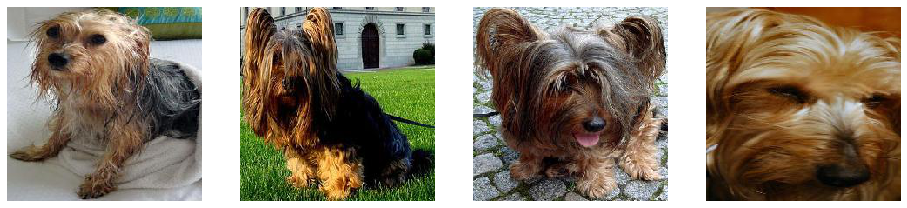

In [20]:
show_dir_images('Images', liste_races[0],4)
show_dir_images('data', liste_races[0],4)

---
##### Race : Appenzeller  (4 images)

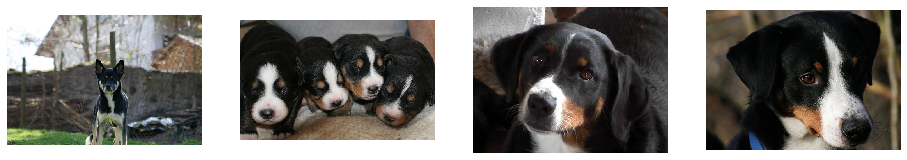

In [21]:
show_dir_images('Images', liste_races[100],4)
show_dir_images('data', liste_races[100],4)

---
##### Race : soft-coated_wheaten_terrier (4 images)

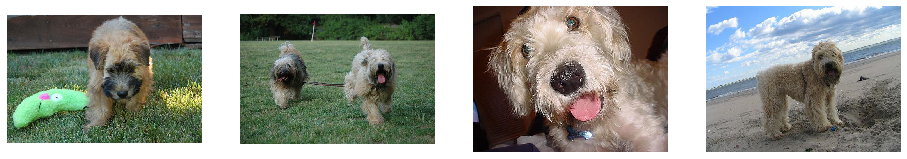

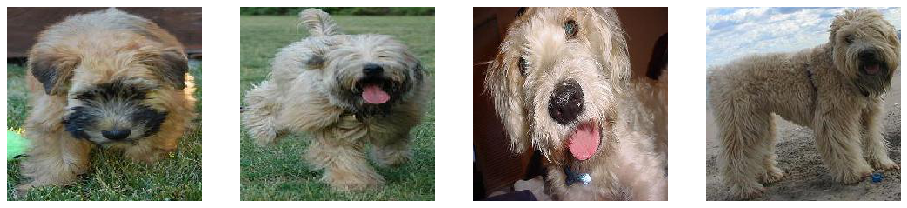

In [22]:
show_dir_images('Images', liste_races[110],4)
show_dir_images('data', liste_races[110],4)